## <font color='blue'> ASTR 21100/31200</font>

## <font color='blue'> Homework Assignment 5</font>
    
 
## <font color='blue'> undergraduate students (50 points + 10 extra-credit)</font>
   
### <font color='blue'> Distributed: Friday, April 29</font>

### <font color='blue'> Due: Friday, May 6, 10pm</font>

In [2]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

# the following commands make plots look better
def plot_prettier(dpi=200, fontsize=10, usetex=False): 
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    # if you don't have LaTeX installed on your laptop and this statement 
    # generates error, comment it out
    plt.rc('text', usetex=usetex)
    
plot_prettier()

### <font color='blue'>Background</font> 

<a href="https://www.insidescience.org/news/three-discoverers-accelerating-universe-share-physics-nobel-prize">Nobel prize in Physics for 2011</a> was awarded to three astronomers for obtaining observational evidence that universe is accelerating. In this project, you will redo analysis that led to this discovery using a modern data set of supernova type Ia, which allows one to get even tighter constraints on the matter and energy content of the universe. 
    
The approach used in this discovery was to exploit the fact that intrinsic brightness or luminosity of <a href="https://astronomy.swin.edu.au/cosmos/t/Type+Ia+Supernova">supernovae of type Ia</a> can be estimated from their "light curve" (the time dependence of brightness after supernova explosion). Their *redshift* can be obtained from the shift (relative to laboratory values) of known prominent absorption lines in their spectrum taken during the epoch close to maximal brightness. Intrinsic luminosity and apparent brightness of supernovae can be used to estimate their distance. Distance together with redshift can be used to constrain parameters governing expansion of our universe, in particular mean matter and energy density.  
    
In this assignment you will reproduce this seminal result.  To do this, you will use calculations and approximations of the distance $d_L$ done in previous assignments. Furthermore, it will involve optimization and MCMC sampling and statistical parameter inference, bringing together almost all of the methods that we discussed up to now. 

## <font color='blue'>Technical background</font>

### <font color='blue'> The need for approximation of luminosity distance $d_L$.</font>
    
During this course, you encountered computation of the *luminosity distance* $d_L(z,H_0,\Omega_{\rm m0},\Omega_\Lambda)$ to distant objects at a given redshift $z$ and assuming some specific values of cosmological parameters $H_0,\Omega_{\rm m0},\Omega_\Lambda$. Computation of the luminosity distance $d_L(z,H_0,\Omega_{\rm m0},\Omega_\Lambda)$ in general requires numerical integration and can be become very computationally expensive if it needs to be done tens of thousands of times. 

This motivates constructing accurate approximations for $d_L(z,H_0,\Omega_{\rm m0},\Omega_\Lambda)$ using methods that we've been discussing during this course (interpolation or regression). The nonlinear dependence of $d_L$ on $z$, $\Omega_{\rm m0}$ and $\Omega_\Lambda$ via the integral (in general case) is particularly important to approximate well, as it cannot be simply obtained by rescaling from results for other model parameters, as can be done for $H_0$.

Indeed, $d_L$ is proportional to $c/H_0$ and this is the only place where $H_0$ appears in its expression. Thus, if we tabulate $\tilde{d}_L$ without  $c/H_0$ factor, it can always be added later to compute the actual value of the luminosity distance $d_L=c/H_0\,\tilde{d}_L(z,\Omega_{\rm m0}, \Omega_\Lambda)$. Given this simple dependence of $d_L$ on $H_0$, there is no need to construct approximation of $d_L$ as a function of $H_0$. We can simply scale it. 

The first step in this project is for you to find an optimal approximation of $\tilde{d}_L$ (i.e. $d_L$ without $c/H_0$ factor) as a function of $\Omega_{\rm m0}$ and $\Omega_\Lambda$. This means that for a given single value of $z$ approximation should be two-dimensional, not two separate 1d approximations as a function of $\Omega_{\rm m0}$ and $\Omega_\Lambda$. 

"Optimal" here means that approximation has target accuracy of the approximation with the smallest training set of tabulated function values. Suppose our target fractional accuracy for $\tilde{d}_L$ is $10^{-4}$. Experiment with 2D polynomial and piecewise spline interpolation for $\tilde{d}_L$ with different size of training point set and their spacing along $x$ and $y$ (i.e. along $\Omega_{\rm m0}$ and $\Omega_\Lambda$ in this exercise) using codes and examples below and identify the approach that reaches this target accuracy with the smallest training sample. 


### <font color='blue'>Background: supernovae type Ia as cosmological lighthouses</font>

As discussed before, the *distance modulus* predicted by a cosmology model with a given values of $H_0$, $\Omega_{\rm m0}$, $\Omega_\Lambda$ is 

$$\mu(z,\Omega_{\rm m0},\Omega_\Lambda) = m-M = 5\log_{10}d_L + 25 = 5\log_{10}\frac{c}{H_0}\,\tilde{d}_L + 25 =5\log_{10}\tilde{d}_L(z,\Omega_{\rm m0},\Omega_\Lambda) + 5\log_{10}c - 5\log_{10}H_0 + 25$$

When apparent magnitude at the time of peak brightness, $m_{\rm SNIa}$, and redshift, $z$, is measured for a supernova type Ia in observations, and if we assume that all such supernovae have the same *intrinsic* luminosity at peak brightness, the observational estimate of their distance modulus can be written as 

$$\mu_{\rm obs} = m_{\rm SNIa} - M_0, $$

where $M_0$ is the absolute magnitude of the supernova at peak brightness. 

A difference between observational estimate, $\mu_{\rm obs}$ and model prediction $\mu(z,\Omega_{\rm m0},\Omega_\Lambda)$, where $z$ is the observed redshift of the supernova then can be written as 

\begin{eqnarray}
\Delta\mu=\mu_{\rm obs} - \mu(z,\Omega_{\rm m0},\Omega_\Lambda) &=&m_{\rm SNIa} - M_0 - 5\log_{10}\tilde{d}_L(z,\Omega_{\rm m0},\Omega_\Lambda) - 5\log_{10}c + 5\log_{10}H_0 - 25=\\ 
&=& m_{\rm SNIa}- 5\log_{10}\tilde{d}_L(z,\Omega_{\rm m0},\Omega_\Lambda) -  \left(M_0 + 5\log_{10}\,\frac{c}{H_0}+25\right)=\\
&=& m_{\rm SNIa} - 5\log_{10}\tilde{d}_L(z,\Omega_{\rm m0},\Omega_\Lambda) - \tilde{M}_0, 
\end{eqnarray}

where 

$$ \tilde{M}_0 = \left(M_0 + 5\log_{10}\,\frac{c}{H_0}+25\right).$$


### <font color='blue'>Background: supernovae as "standardizable candles"</font>
    
Objects for which intrinsic brightness is the same for different objects are called "standard candles" in astronomy. Such objects are extremely useful for distance measurements, but unfortunately no perfect standard candles exist. For decades astronomers did think that supernovae type Ia are standard candles. However, about 30 years ago it was shown that this is not quite true. Intrinsic absolute magnitude of supernovae of this type varies, but the variation occurs not randomly, but systematically as a function of supernova color (difference of magnitudes in different bands) and the characteristic time it takes for a supernova brightness to fade from its peak brightness. 

Both of these properties are observable and are characterized by the color parameter, $c$, related to supernova color at peak brightness and lightcurve stretch parameter, $x_1$. Astronomers found that the parameter nearly constant for all supernovae is not $M_0$ ($M_0$ varies), but the combination $M_0 - \alpha x_1 + \beta c$, where $\alpha$ and $\beta$ are parameters that are constant for all supernovae. $M_0$,  and $\alpha$ and $\beta$ are *nuisance* parameters of the model and have to be estimated from the data itself. 

Thus, we can modify our model for the distance modulus by including these two extra parameters: 

$$
\Delta\mu=\mu_{\rm obs} - \mu(z,\Omega_{\rm m0},\Omega_\Lambda)= m_{\rm SNIa} - 5\log_{10}\tilde{d}_L(z,\Omega_{\rm m0},\Omega_\Lambda) - \tilde{M}_0 + \alpha x_1 - \beta c,$$ 

with the vector of 5 parameters $\mathbf{x}=\{\Omega_{\rm m0},\Omega_\Lambda, \tilde{M}_0, \alpha,\beta\}$ and $x_1$ and $c$ stretch and color parameters measured for each supernova. 

These parameters are available in the sample that is read below. 
    
 Only 2 of the 5 parameters, $\Omega_{\rm m0}$ and $\Omega_\Lambda$, are of scientific interest. The other parameters are used to parameterize our ignorance about some aspect of this inference and are called *nuisance parameters*. Nevertheless, without taking into account and sampling these nuisance parameters we cannot get an unbiased constraint. 

**Likelihood pdf.** We will assume that measurements have Gaussian uncertainties which results in a Gaussian likelihood (see notebook 11_mcmc_stat_models notebook for detailes of how such pdf is derived):

$$L(\mathbf{y}\vert\mathbf{x}) = \prod\limits_{i=0}^{N_{\rm SN}-1}\,\frac{1}{\sqrt{2\pi\sigma_{\Delta\mu,i}^2}}\,\exp\left[-\frac{1}{2}\frac{\Delta\mu^2_i}{\sigma_{\Delta\mu,i}^2}\right]$$

We always want to sample the logarithm of the likelihood pdf, not the pdf itself to avoid numerical underflow, so we will use $\ln L(\mathbf{y}\vert\mathbf{x})$ (logarithm of a product becomes sum): 

$$\ln L(\mathbf{y}\vert\mathbf{x}) = -\frac{1}{2}\,\sum\limits_{i=0}^{N_{\rm SN}-1}\frac{\Delta\mu^2_i}{\sigma_{\Delta\mu,i}^2}-\frac{1}{2}\sum\limits_{i=0}^{N_{\rm SN}-1}\ln(2\pi\sigma_{\Delta\mu,i}^2)$$


**Data.** The code snippet below reads data from the study of <a href="https://ui.adsabs.harvard.edu/abs/2014A%26A...568A..22B/abstract">Betoule et al. (2014)</a>, which was downloaded <a href="http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html">here</a>. The function uses numpy loadtxt function, which allows to read well formatted columns of data in the ASCII format easily. 
    
After reading numpy array <tt>zsn</tt> contains redshifts of 740 supernovae, while arrays <tt>msn</tt>, $m$, and <tt>emsn</tt> contain measured apparent magnitudes and their uncertainties. Parameters <tt>x1</tt>, <tt>ex1</tt>, <tt>csn</tt>, <tt>ecsn</tt> are the color and stretch parameters of the supernovae in their sample and their uncertainties.

In [3]:
#zCMB, mB, emB are redshift of SNia, its apparent B-band magnitude, and emB is its error
# x1 and ex1 are stretch parameter measured for each SN and its uncertainty
# csn and ecsn are color parameter and its uncertainty
zCMB, mB, emB, x1, ex1, csn, ecsn = np.loadtxt('https://astro.uchicago.edu/~andrey/classes/a211/data/jla_lcparams.txt', 
                                               usecols=(1, 4, 5, 6, 7, 8, 9), unpack=True)

print("read sample of %d supernovae..."%(np.size(zCMB)))

read sample of 740 supernovae...


### <font color='blue'>Exercise 1 (5 points): Constructing approximation for $d_L$</font>

Using the best approximation for $d_L$ that you identified in ex 1 of hw 4, construct a Python list of approximations for each of the 740 supernovae redshift. In other words, for each supernova in the sample above, construct approximation $\tilde{d}_L(\Omega_{\rm m0},\Omega_\Lambda)$ within the range $\Omega_{\rm m0}\in[0,1]$, $\Omega_{\Lambda}\in[0,1]$. Construct approximation and add object that computes $\tilde{d}_L(\Omega_{\rm m0},\Omega_\Lambda)$ for input values of $\Omega_{\rm m0}$ and $\Omega_\Lambda$. 


Namely, if the list is named <tt>dlz</tt>, you should be able to compute $d_L$ for a given supernova redshift $z_i$ and <tt>om</tt>, <tt>oml</tt> values as <tt>dlz[i](om, oml)</tt>. 

Test your list via direct calculations of $d_L$ using your own function or using AstroPy function. 

***Note:*** If you did not succeed in completing this exercise, the approximation will be provided to you so you can use it in the subsequent steps. 

### <font color='blue'>Exercise 2 (10 points): Implementing likelihood and finding parameter values that maximizes likelihood of supernovae type Ia data given model parameters</font>

**Task 2a (5 points).** Implement a function to comput the likelihood using the expression:

$$\ln L(\mathbf{y}\vert\mathbf{x}) = -\frac{1}{2}\,\sum\limits_{i=0}^{N_{\rm SN}-1}\frac{\Delta\mu^2}{\sigma_{\Delta\mu,i}^2}-\frac{1}{2}\sum\limits_{i=0}^{N_{\rm SN}-1}\ln(2\pi\sigma_{\Delta\mu,i}^2)$$

and $\sigma_{\Delta\mu,i}^2$ is total uncertainty of the observational estimate of the distance modulus that accounts for uncertainties in $m_B$, $x_1$, and $c$, which by rules of error propagation is: 

$$\sigma_{\Delta\mu,i}^2 = \sigma_{m_B}^2 + \alpha^2\sigma_{x1}^2 + \beta^2\sigma_c^2,$$

which means that the error also depends on the two model parameters, $\alpha$ and $\beta$. 

The function should pass the supernova data and $d_L$ approximation via <tt>args</tt>. 

**Task 2b. (5 points)** Test your function by implementing a helper function that computes $-\ln L$ and find the values of 5 parameters $\mathbf{x}=\{\Omega_{\rm m0},\Omega_\Lambda, \tilde{M}_0, \alpha,\beta\}$ that minimize this function using the differential evolution function you implemented in hw 4, or <a href="https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.differential_evolution.html"><tt>scipy.minimize.differential_evolution</tt></a> function to find parameters that minimize $-\ln L$ and print them out. 

To define bounds, you can use ranges for $\Omega_{\rm m0}$ and $\Omega_\Lambda$ of $[0,1]$ and for $\tilde{M}_0$ say $[20, 28]$. For $\alpha$ good choice for range is $[0.05, 0.3]$ and for $\beta$: $[1., 5.]$. Feel free to experiment with these ranges. 


### <font color='blue'>Exercise 3 (5 points): Using inverse transform </font>
    
to sample random numbers from the distribution $g(x)=A/\sqrt{x}$ for $x\in[1/a,a]$ where $a$ is a constant and $A$ is normalization constant.

**Task 3a (1 point).** Derive expression for the normalization constant $A$. 

**Task 3b (1 point).** Derive the expression for the cdf $P(x)$ and its inverse $x = P^{-1}(y)$, where $y$ is value in the range $[0,1]$. 

**Task 3c (3 points).** Assuming $a=2$ draw random numbers using inverse transform method using the inverse cdf you derive to draw $10^6$ sample tha follow pdf $g(x)$. Test your results by histogramming results and and comparing the histogram to the analytic expression for $g(x)$ shown as a line. 


**Note:** if you are not able to complete this exercise, solution can be provided to you so you can complete the exercise below. 

### <font color='blue'> Exercise 4: Implementing the affine-invariant MCMC algorithm of Goodman & Weare (2010) and using it to sample the likelihood (30 points + possible 10 extra-credit). </blue>
    
#### <font color='blue'>Task 4a (20 points).</blue>
Implement the "affine-invariant" MCMC algorithm proposed by <a href="http://msp.org/camcos/2010/5-1/p04.xhtml">Goodman & Weare (2010, hereafter GW10)</a> and described in <a href="https://drive.google.com/file/d/1h-0Be_HwXRdKOgdKSdtX0PiIe6-9Logg/view?usp=sharing"><tt>10_multid_sampling_mcmc</tt></a> notebook in the form of a Python function.
    
The overall structure of the function is similar to the differential evolution function you should have implemented and you can use your implementation or implementation in the solution that will be provided to you as a starting point. The difference is in the way that steps (mutation) are made and condition defining whether a step is accepted or rejected are different. The stopping criterion here, however, can be simple - for example, stop after a given number of steps is made. 
    

Below is the possible format of such function. 
    
    
    def mcmc_gw10(x0, logpdf = None, args = None, nsteps=10000):
        """
        MCMC sampler implementing the Goodman & Weare (2010) 
        affine-invariant algorithm 

        run for nminsteps and convergence specified by convergence_func is reached

        Parameters:
        ------------
        x - numpy array of floats of shape (nwalkers,ndim)
            containing initial x values of the chains
        logpdf - python function object
            ln(pdf) where pdf is the target pdf to sample
        args - list, list of arguments to pass logpdf functions (as logpdf(x, *args))
        nteps - int
            minimum number of MCMC steps (iterations) to make
    
        Returns:
        ---------
        chain - numpy array of shape (nwalkers*nsteps, ndim)
            x values of samples in the MCMC chains given that chain length is nsteps
        """

**Possible extra-credit 10 points** - if you use numpy capabilities to fully vectorize the MCMC function so that there is only the loop making steps and there are no loops over walkers and dimensions. 

**Note:** The $z_r$ random numbers used in the GW10 algorithm can be sampled using the implementation of exercise 3 above with $a=2$. 
    
***Note:*** It can be convenient to defined a class that implements MCMC sampler and methods associated with it (this is what is done in the <tt>emcee</tt> package). Once you are done with your function and the rest of the homework, I encourage you try this if you want to practice using classes in practice. Guidance can be provided upon request. 


#### <font color='darkblue'> Task 4b (3 points)</font>

Test your implementation of the GW 10 MCMC algorithm by sampling $\ln$ 2d Gaussian pdf using function <tt>lngauss_nd</tt> below. Plot resulting distributions of chain values for $\Omega_{\rm m0}$ and $\Omega_\Lambda$ along with the confidence contours that correspond to $1-$ and $2-\sigma$ of the Gaussian distribution and enclose $0.6827$ and $0.9545$ of the total samples using example below using <tt>plot_2d_dist</tt> function from <tt>codes/plotting.py</tt>. 

Example below shows such test using <tt>emcee</tt> package. 

In [7]:
def lngauss_nd(x, means, icov):
    """
    ln of N-dimensional unnormalized Gaussian pdf (neglecting the constant in front of exp)
    
    Parameters:
    -----------
    x - real 1d numpy vector of size ndim
        position of a sample in ndim-dimensional space
    means - real 1d numpy vector of size ndim
        mean values of the Gaussian in each coordinate
    icov - numpy array of floats of shape (ndim, ndim)
        inverse covariance matrix of the Gaussian
        
    Returns:
    --------
    
    a real number 
        ln(Gaussian)
    """
    diff = x - means
    
    return -0.5 * np.dot(diff.T, np.dot(icov, diff)) 

In [21]:
# define st deviations for the two dimension of the Gaussian and value of correlation coefficient
means = [0., 0.] # values of means of Gaussian pdf for 2 dimensions
s1, s2, r = 1.0, 1.0, 0.95

# covariance matrix of 2-dimensional Gaussian
cov = [[s1**2, r*s1*s2], [r*s1*s2, s2**2]]
# compute the inverse covariance matrix
icov = np.linalg.inv(cov)
args = [means, icov]

In [16]:
import emcee

ndim, nwalkers, nsteps = 2, 50, 10000

# initialize walkers around best fit parameter values
p0 = np.zeros(((nwalkers, ndim)))
for d in range(ndim): 
    # generate Gaussian random numbers 
    # 0.05 is a small dispersion around the mean. The exact value does not matter
    p0[:,d] = 0.05*np.random.normal(size=nwalkers)
    
# create an instance of the MCMC sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim,  lngauss_nd, args=args)

# run for a given nsteps
dummy = sampler.run_mcmc(p0, nsteps)

# get chain
chain = np.array(sampler.chain)

In [17]:
chain.shape # shape is (nwalkers, nsteps, ndim)

(50, 10000, 2)

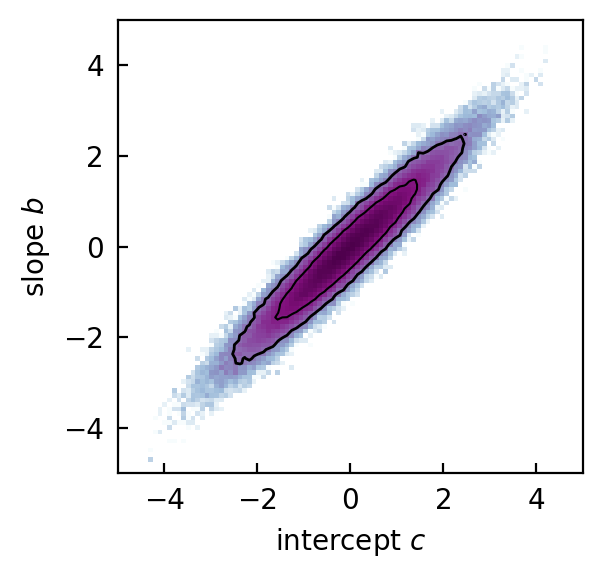

In [20]:
conflevs = [0.6827, 0.9545]

x = chain[:,:,0].flatten()
y = chain[:,:,1].flatten()


plot_2d_dist(x, y, xlim=[-5, 5], ylim =[-5,5], 
             nxbins=100, nybins=100, 
             clevs=conflevs, 
             xlabel=r'${\rm intercept}\ c$', 
             ylabel=r'${\rm slope}\ b$', figsize=(3,3))

#### <font color='darkblue'> Task 4c (7 points)</font>

Write a function that defines natural logarithm of prior pdf for all parameters $\ln p$. Write another function that defines unnormalized posterior pdf, i.e. combines $\ln L$ (from ex 2 aove) and $\ln p$ into $\ln L(\mathbf{y}\vert\mathbf{x}) + \ln p(\mathbf{x})=\ln L(\mathbf{y}\vert\mathbf{x})p(\mathbf{x})$. For $p$ for all parameters you can assume uniform pdf defined between minimum and maximum value you choose for each parameter (these should be $0$ and $1$ for $\Omega_{\rm m0}$ and $\Omega_\Lambda$ not to extrapolate your approximation for $\tilde{d}_L$. The total $\ln$ of prior pdf for all parameters is a sun of $\ln$ prior pdfs for individual parameters.

* Use your implementation of GW10 or <tt>emcee</tt> package to sample $\ln L(\mathbf{y}\vert\mathbf{x})p(\mathbf{x})$ using GW10 MCMC, initializing "walker" positions around the values of the best fit parameters you obtained in ex 2 above. 

* Plot resulting distributions of chain values for $\Omega_{\rm m0}$ and $\Omega_\Lambda$ along with the confidence contours that correspond to $1-$ and $2-\sigma$ of the Gaussian distribution and enclose $0.6827$ and $0.9545$. 

* Use examples in [<tt>11_mcmc_stat_models</tt>](https://drive.google.com/file/d/1ksi7VjA48PutOS7TJ17FS5H2Ve0qmjv2/view?usp=sharing) notebook (for example, function <tt>chain_stats</tt> to output statistics about $\Omega_{\rm m0}$ and $\Omega_\Lambda$) to output statistics of these quantities.

***Note:*** If you don't manage to complete your implementation of GW10, you can use <tt>emcee</tt> package, using example shown above, to complete this exercise. 